# Hiyerarşik Kümeleme

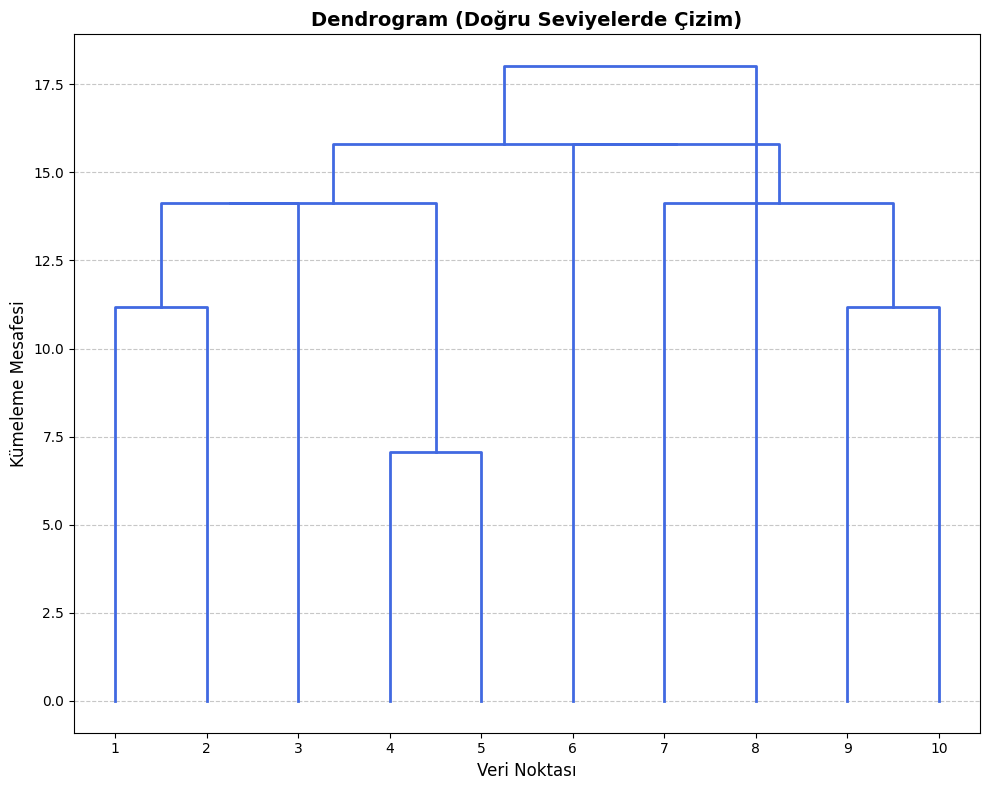

Kümeleme sonucu 'clustered_data_1.csv' dosyasına kaydedildi.
Çalıştırma 1 tamamlandı.


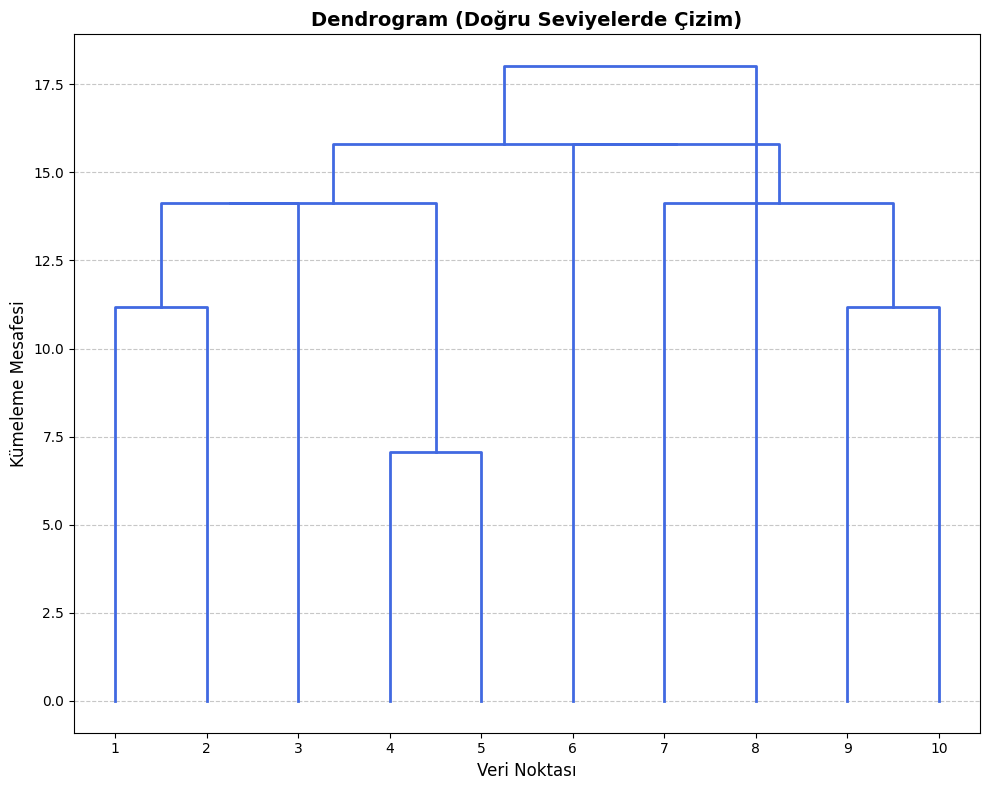

Kümeleme sonucu 'clustered_data_2.csv' dosyasına kaydedildi.
Çalıştırma 2 tamamlandı.


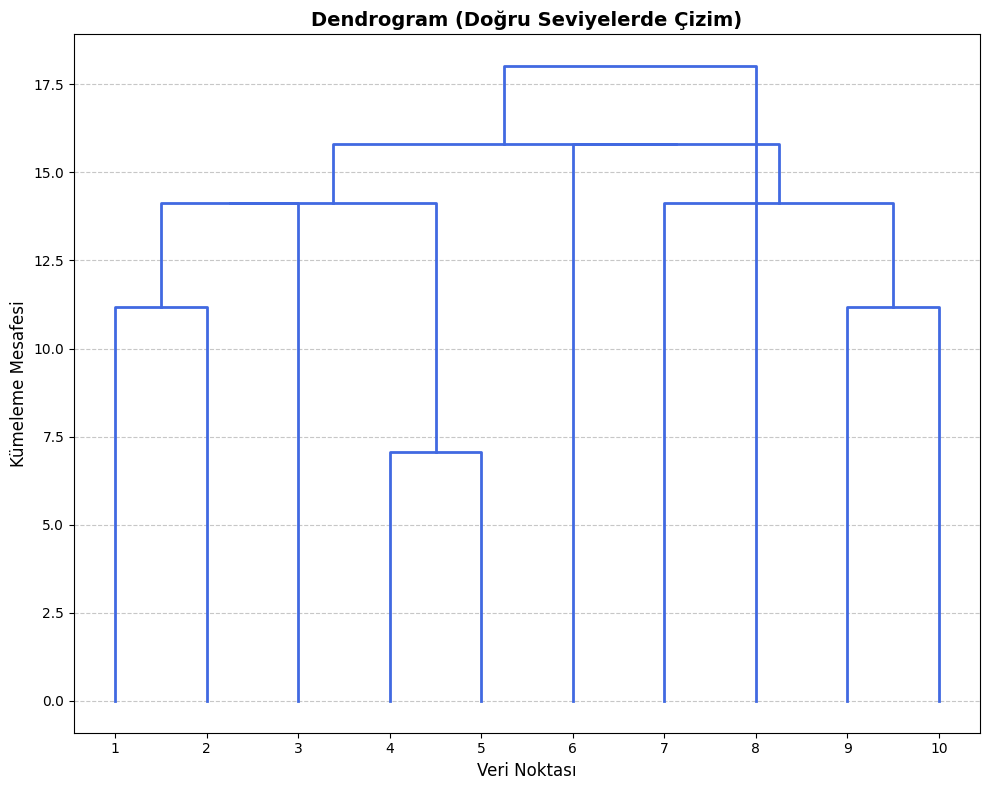

Kümeleme sonucu 'clustered_data_3.csv' dosyasına kaydedildi.
Çalıştırma 3 tamamlandı.


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Öklidyen mesafesi hesaplama
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

# Hiyerarşik kümeleme fonksiyonu
def hierarchical_clustering(data):
    n = len(data)
    clusters = {i: [i] for i in range(n)}  # Her veri kendi kümesi
    distances = np.zeros((n, n))           # Mesafe matrisi

    # Tüm mesafeleri hesapla
    for i in range(n):
        for j in range(i + 1, n):
            distances[i, j] = euclidean_distance(data[i], data[j])
            distances[j, i] = distances[i, j]

    linkage_matrix = []

    while len(clusters) > 1:
        # En yakın iki küme bulun
        min_dist = float('inf')
        cluster_pair = (None, None)
        keys = list(clusters.keys())

        for i in range(len(keys)):
            for j in range(i + 1, len(keys)):
                c1, c2 = keys[i], keys[j]
                dist = min(distances[p1, p2] for p1 in clusters[c1] for p2 in clusters[c2])
                if dist < min_dist:
                    min_dist = dist
                    cluster_pair = (c1, c2)

        # İki kümeyi birleştir
        c1, c2 = cluster_pair
        new_cluster = clusters[c1] + clusters[c2]
        new_cluster_id = max(clusters.keys()) + 1
        clusters[new_cluster_id] = new_cluster
        del clusters[c1]
        del clusters[c2]

        # Linkage matrisine ekle
        linkage_matrix.append([min(c1, c2), max(c1, c2), min_dist, len(new_cluster)])

    return np.array(linkage_matrix), clusters

# CSV'den veri okuma ve sadece belirtilen sütunlarla çalışma
def load_data_from_csv(file_path, columns=None):
    data = pd.read_csv(file_path)

    if columns:  # Belirtilen sütunlar var ise, sadece onları al
        data = data[columns]

    return data.values

# Dendrogram çizim fonksiyonu
def plot_dendrogram(linkage_matrix, labels):
    plt.figure(figsize=(10, 8))
    current_positions = {i: (i, 0) for i in range(len(labels))}  # Her kümenin (x, y) koordinatları

    for i, (c1, c2, dist, _) in enumerate(linkage_matrix):
        # Alt kümelerin pozisyonlarını al
        x1, y1 = current_positions[c1]
        x2, y2 = current_positions[c2]
        y = dist  # Birleşme yüksekliği

        # Alt kümeleşer sıfıra inmesin, doğru yüksekliği kullan
        plt.plot([x1, x1, x2, x2], [y1, y, y, y2], c='royalblue', lw=2)

        # Yeni kümenin pozisyonunu güncelle
        current_positions[len(labels) + i] = ((x1 + x2) / 2, y)

    # Ekseni ve tasarımı ayarla
    plt.xticks(range(len(labels)), labels, fontsize=10)
    plt.title("Dendrogram (Doğru Seviyelerde Çizim)", fontsize=14, fontweight='bold')
    plt.xlabel("Veri Noktası", fontsize=12)
    plt.ylabel("Kümeleme Mesafesi", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# CSV dosyasından veriyi yükle ve kümeleme işlemi yap
def perform_clustering(file_path, output_file, n_clusters=None, columns=None):
    data = load_data_from_csv(file_path, columns)

    # Hiyerarşik kümeleme yap
    linkage_matrix, clusters = hierarchical_clustering(data)

    # Dendrogram'ı çiz
    plot_dendrogram(linkage_matrix, labels=np.arange(1, len(data) + 1))

    # Son kümeleme sonucunu ekleyip kaydet
    final_clusters = np.zeros(len(data), dtype=int)
    for cluster_id, members in clusters.items():
        for member in members:
            final_clusters[member] = cluster_id

    data_with_clusters = np.hstack((data, final_clusters.reshape(-1, 1)))
    columns_with_clusters = list(columns or ["Feature_1", "Feature_2"]) + ["Cluster"]

    output_df = pd.DataFrame(data_with_clusters, columns=columns_with_clusters)

    # Kümeleme sonucu kaydet
    output_df.to_csv(output_file, index=False)
    print(f"Kümeleme sonucu '{output_file}' dosyasına kaydedildi.")

# Birden fazla çalıştırma
def multiple_clustering(file_path, n_runs=3, output_prefix="clustered_output", columns=None):
    for i in range(n_runs):
        output_file = f"{output_prefix}_{i+1}.csv"
        perform_clustering(file_path, output_file, columns=columns)
        print(f"Çalıştırma {i+1} tamamlandı.")

# Kullanıcı isteğine göre fonksiyon çağırma
file_path = "/content/KümelemeÖrnek.csv"  # CSV dosyanın yolu

# Örneğin sadece 'Feature_1' ve 'Feature_2' ile çalıştırmak
columns_to_use = ["Age", "SpendingScore"]  # Kullanmak istediğiniz sütunları buraya ekleyin
multiple_clustering(file_path, n_runs=3, output_prefix="clustered_data", columns=columns_to_use)


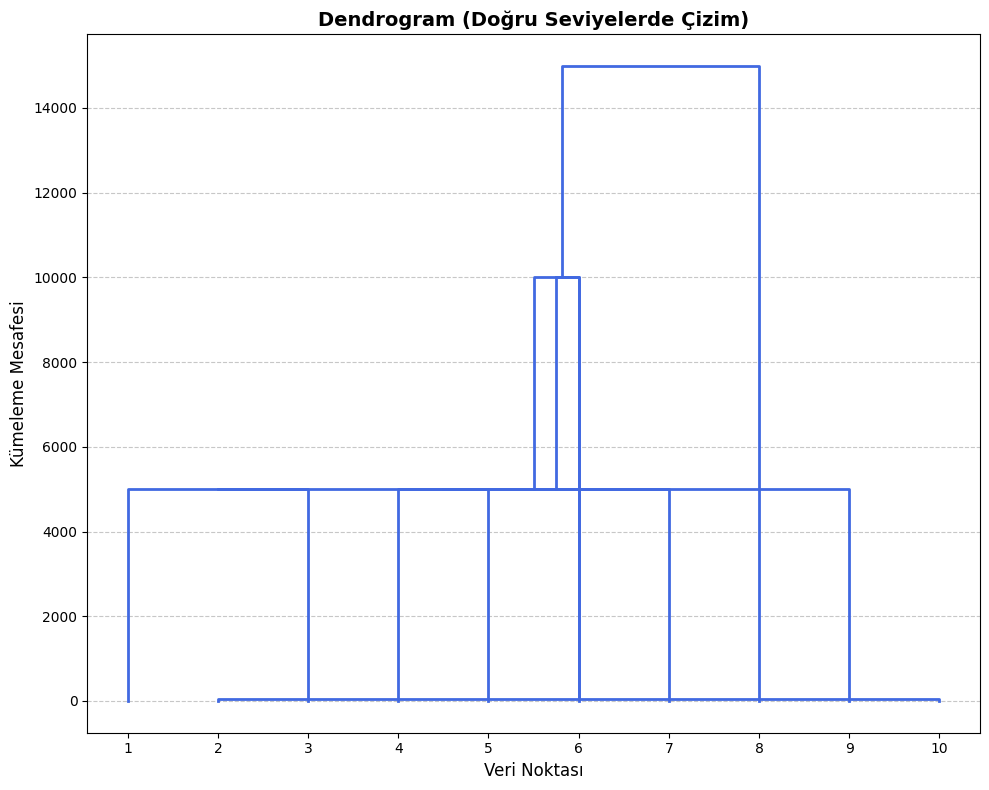

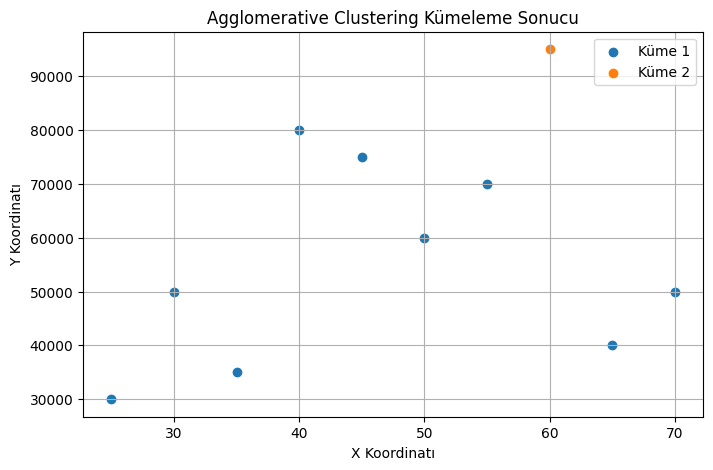

Kümeleme sonucu 'clustered_data_with_age.csv' dosyasına kaydedildi.


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import AgglomerativeClustering

# Öklidyen mesafesi hesaplama
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

# Hiyerarşik kümeleme fonksiyonu
def hierarchical_clustering(data):
    n = len(data)
    clusters = {i: [i] for i in range(n)}  # Her veri kendi kümesi
    distances = np.zeros((n, n))           # Mesafe matrisi

    # Tüm mesafeleri hesapla
    for i in range(n):
        for j in range(i + 1, n):
            distances[i, j] = euclidean_distance(data[i], data[j])
            distances[j, i] = distances[i, j]

    linkage_matrix = []

    while len(clusters) > 1:
        # En yakın iki küme bulun
        min_dist = float('inf')
        cluster_pair = (None, None)
        keys = list(clusters.keys())

        for i in range(len(keys)):
            for j in range(i + 1, len(keys)):
                c1, c2 = keys[i], keys[j]
                dist = min(distances[p1, p2] for p1 in clusters[c1] for p2 in clusters[c2])
                if dist < min_dist:
                    min_dist = dist
                    cluster_pair = (c1, c2)

        # İki kümeyi birleştir
        c1, c2 = cluster_pair
        new_cluster = clusters[c1] + clusters[c2]
        new_cluster_id = max(clusters.keys()) + 1
        clusters[new_cluster_id] = new_cluster
        del clusters[c1]
        del clusters[c2]

        # Linkage matrisine ekle
        linkage_matrix.append([min(c1, c2), max(c1, c2), min_dist, len(new_cluster)])

    return np.array(linkage_matrix), clusters

# CSV'den veri okuma
def load_data_from_csv(file_path, columns=None):
    data = pd.read_csv(file_path)

    if columns:  # Belirtilen sütunlar var ise, sadece onları al
        data = data[columns]

    return data.values

# Dendrogram çizim fonksiyonu
def plot_dendrogram(linkage_matrix, labels):
    plt.figure(figsize=(10, 8))
    current_positions = {i: (i, 0) for i in range(len(labels))}  # Her kümenin (x, y) koordinatları

    for i, (c1, c2, dist, _) in enumerate(linkage_matrix):
        # Alt kümelerin pozisyonlarını al
        x1, y1 = current_positions[c1]
        x2, y2 = current_positions[c2]
        y = dist  # Birleşme yüksekliği

        # Alt kümeleşer sıfıra inmesin, doğru yüksekliği kullan
        plt.plot([x1, x1, x2, x2], [y1, y, y, y2], c='royalblue', lw=2)

        # Yeni kümenin pozisyonunu güncelle
        current_positions[len(labels) + i] = ((x1 + x2) / 2, y)

    # Ekseni ve tasarımı ayarla
    plt.xticks(range(len(labels)), labels, fontsize=10)
    plt.title("Dendrogram (Doğru Seviyelerde Çizim)", fontsize=14, fontweight='bold')
    plt.xlabel("Veri Noktası", fontsize=12)
    plt.ylabel("Kümeleme Mesafesi", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Veriyi ve gruplamaları görselleştir
def plot_clusters(data, labels, title="Kümeleme Sonucu", clustering_type="Hiyerarşik Kümeleme"):
    plt.figure(figsize=(8, 5))
    plt.title(title)
    for label in np.unique(labels):
        group = data[labels == label]
        plt.scatter(group[:, 0], group[:, 1], label=f'Küme {label+1}')

    plt.xlabel("X Koordinatı")
    plt.ylabel("Y Koordinatı")
    plt.legend()
    plt.grid(True)
    plt.show()

# Hiyerarşik kümeleme sonucu görselleştirme ve Ağırlaştırıcı Kümeleme ile gruplama
def perform_clustering_with_agglo_and_hierarchical(file_path, output_file, columns=None, n_clusters=2):
    # Veriyi yükle
    data = load_data_from_csv(file_path, columns)

    # 1. Hiyerarşik Kümeleme (Dendrogram çizimi)
    linkage_matrix, clusters = hierarchical_clustering(data)
    plot_dendrogram(linkage_matrix, labels=np.arange(1, len(data) + 1))

    # 2. Agglomerative Clustering
    cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage='single')
    agglo_labels = cluster.fit_predict(data)

    # Agglomerative Kümeleme Görselleştirmesi
    plot_clusters(data, agglo_labels, title="Agglomerative Clustering Kümeleme Sonucu", clustering_type="Agglomerative Clustering")

    # Kümeleme sonuçlarını dosyaya kaydet
    data_with_agglo_labels = np.hstack((data, agglo_labels.reshape(-1, 1)))
    columns_with_labels = list(columns or ["Feature_1", "Feature_2"]) + ["Cluster"]

    output_df = pd.DataFrame(data_with_agglo_labels, columns=columns_with_labels)
    output_df.to_csv(output_file, index=False)
    print(f"Kümeleme sonucu '{output_file}' dosyasına kaydedildi.")

# Kullanıcı isteğine göre fonksiyon çağırma
file_path = "/content/KümelemeÖrnek.csv"  # CSV dosyanın yolu
columns_to_use = ["Age","AnnualIncome"]  # Kullanmak istediğiniz sütunlar

perform_clustering_with_agglo_and_hierarchical(file_path, "clustered_data_with_age.csv", columns=columns_to_use, n_clusters=2)


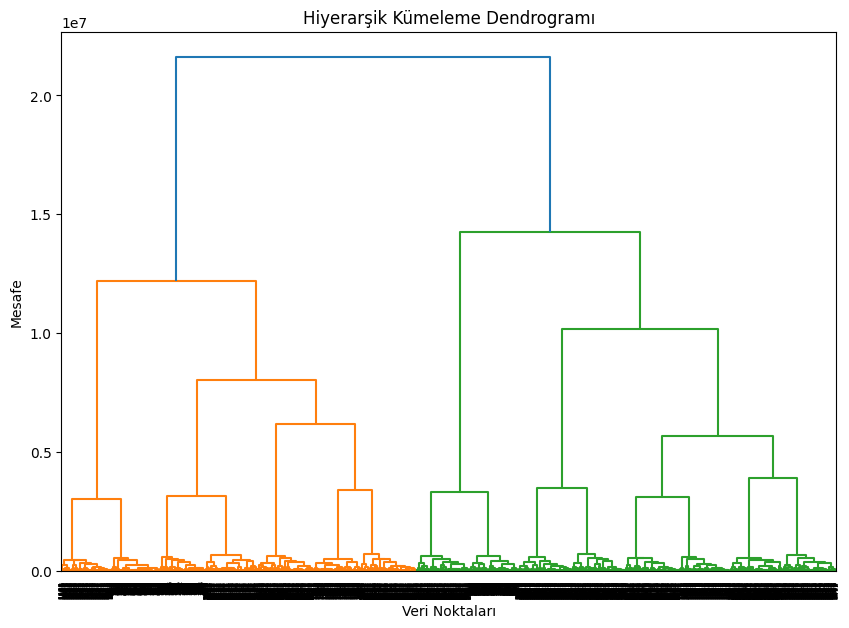

Veri Noktası 0: Küme 3
Veri Noktası 1: Küme 3
Veri Noktası 2: Küme 3
Veri Noktası 3: Küme 3
Veri Noktası 4: Küme 3
Veri Noktası 5: Küme 3
Veri Noktası 6: Küme 3
Veri Noktası 7: Küme 3
Veri Noktası 8: Küme 3
Veri Noktası 9: Küme 3
Veri Noktası 10: Küme 3
Veri Noktası 11: Küme 3
Veri Noktası 12: Küme 3
Veri Noktası 13: Küme 3
Veri Noktası 14: Küme 3
Veri Noktası 15: Küme 3
Veri Noktası 16: Küme 3
Veri Noktası 17: Küme 3
Veri Noktası 18: Küme 3
Veri Noktası 19: Küme 3
Veri Noktası 20: Küme 3
Veri Noktası 21: Küme 3
Veri Noktası 22: Küme 3
Veri Noktası 23: Küme 3
Veri Noktası 24: Küme 3
Veri Noktası 25: Küme 3
Veri Noktası 26: Küme 3
Veri Noktası 27: Küme 3
Veri Noktası 28: Küme 3
Veri Noktası 29: Küme 3
Veri Noktası 30: Küme 3
Veri Noktası 31: Küme 3
Veri Noktası 32: Küme 3
Veri Noktası 33: Küme 3
Veri Noktası 34: Küme 3
Veri Noktası 35: Küme 3
Veri Noktası 36: Küme 3
Veri Noktası 37: Küme 3
Veri Noktası 38: Küme 3
Veri Noktası 39: Küme 3
Veri Noktası 40: Küme 3
Veri Noktası 41: Küme 3
Ve

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import pandas as pd

# Veriyi tanımla (örneğin 2 sütunlu 4 veri noktasından oluşan bir set)
data = pd.read_csv('/content/S1.csv', sep=';') # Use sep=';' to specify semicolon as delimiter

# Hiyerarşik kümeleme (agglomeratif) için 'ward' yöntemi kullanılır
Z = linkage(data, method='ward')

# Dendrogram'ı çiz
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title("Hiyerarşik Kümeleme Dendrogramı")
plt.xlabel("Veri Noktaları")
plt.ylabel("Mesafe")
plt.show()

# Küme sayısını belirle (örneğin 3 küme)
num_clusters = 18

# fcluster fonksiyonu ile küme atamalarını al
clusters = fcluster(Z, t=num_clusters, criterion='maxclust')

# Küme bilgilerini yazdır ve dosyaya kaydet
with open('cluster_info.txt', 'w') as file:
    for i, cluster_id in enumerate(clusters):
        line = f"Veri Noktası {i}: Küme {cluster_id}\n"
        print(line, end='')  # Konsola yazdır
        file.write(line)  # Dosyaya yaz

print(f"Küme bilgileri 'cluster_info.txt' dosyasına kaydedildi.")

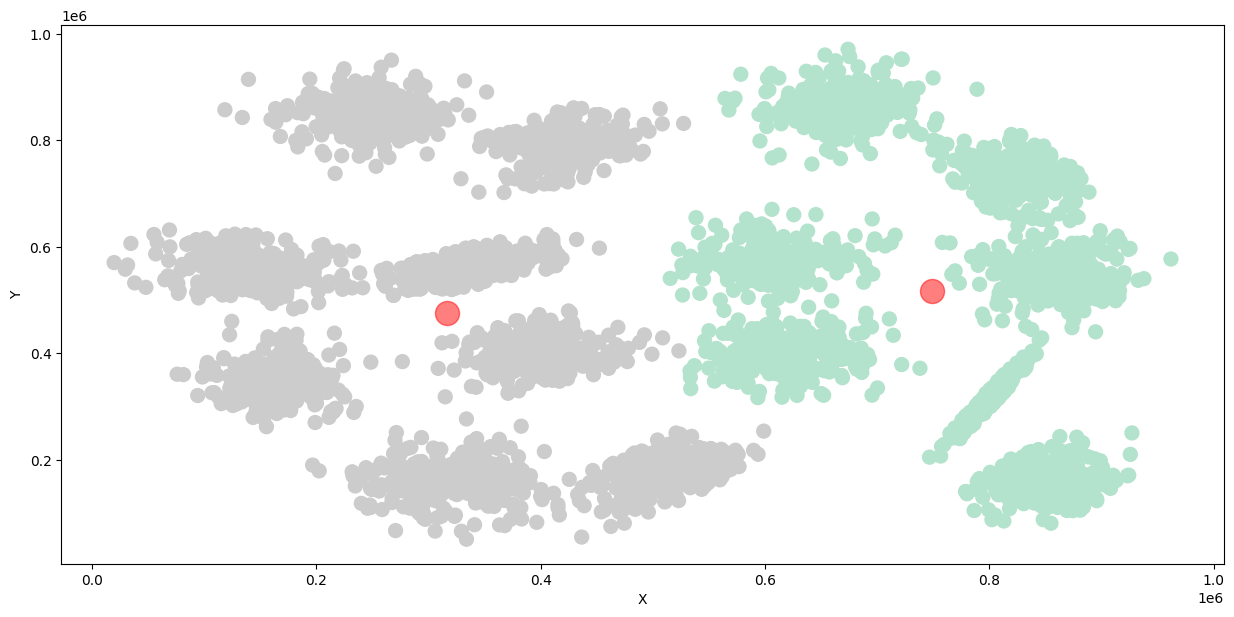

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
import pandas as pd

data = pd.read_csv('/content/S1.csv', sep=';') # Use sep=';' to specify semicolon as delimiter

data.head()
# Hiyerarşik Kümeleme (Agglomerative)
Z = linkage(data, method='ward')

# Küme sayısını belirlemek için fcluster kullanılır
labels = fcluster(Z, t=2, criterion='maxclust')  # Örneğin, 2 küme isteniyor

# Kümeleme sonuçlarını görselleştirme
plt.figure(figsize=(15, 7))
plt.clf()

# Sınıf tabanlı scatter plot
plt.scatter(data['X'],data['Y'],c=labels, cmap='Pastel2', s=100)

# Küme merkezleri veya centroidler (hiyerarşik kümeleme için ortalama hesaplanabilir)
centroids = data.groupby(labels).mean()

# Centroidlerin gösterilmesi
plt.scatter(centroids['X'], centroids['Y'],
            c='red', s=300, alpha=0.5)

# Grafik başlıkları ve etiketleri
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

# Geri Kodlar

Please Enter Your Dataset Path/content/KümelemeÖrnek1.csv


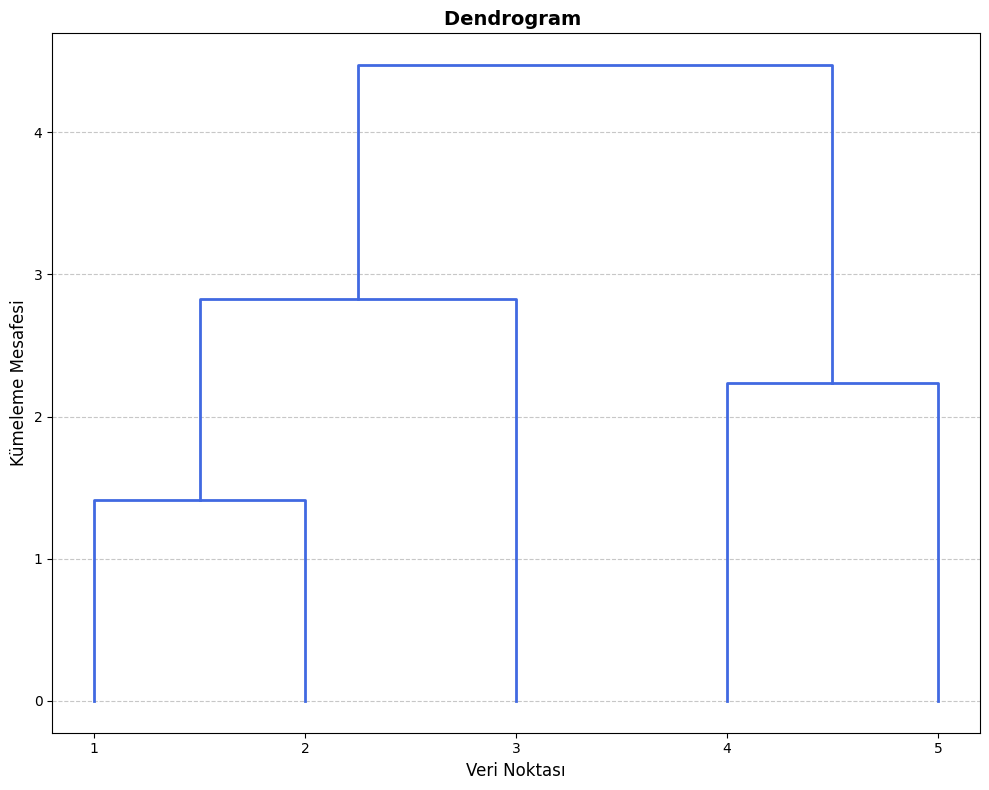

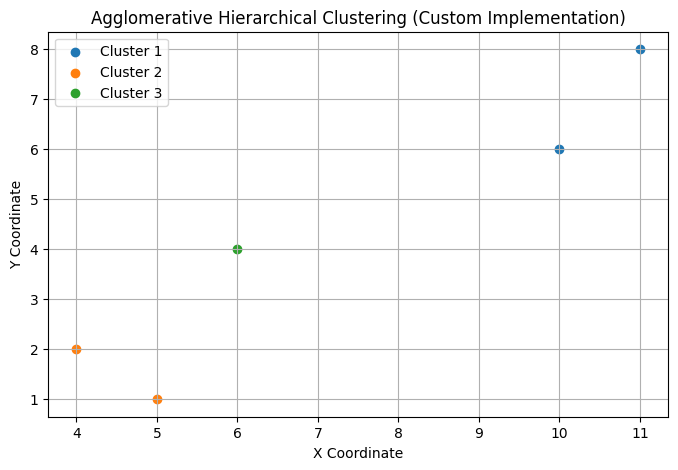

Cluster labels:
[2 2 3 1 1]


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Veri seti
file_path = input("Please Enter Your Dataset Path")

data = pd.read_csv(file_path)

# Öklidyen mesafesi hesaplama
# Öklidyen mesafesi hesaplama
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

# Hiyerarşik kümeleme fonksiyonu
def hierarchical_clustering(data):
    # DataFrame'i NumPy dizisine dönüştür
    data_array = data.values

    n = len(data_array)
    clusters = {i: [i] for i in range(n)}  # Her veri kendi kümesi
    distances = np.zeros((n, n))           # Mesafe matrisi

    # Tüm mesafeleri hesapla
    for i in range(n):
        for j in range(i + 1, n):
            # data_array kullanarak satırlara eriş
            distances[i, j] = euclidean_distance(data_array[i], data_array[j])
            distances[j, i] = distances[i, j]

    linkage_matrix = []

    while len(clusters) > 1:
        # En yakın iki küme bulun
        min_dist = float('inf')
        cluster_pair = (None, None)
        keys = list(clusters.keys())

        for i in range(len(keys)):
            for j in range(i + 1, len(keys)):
                c1, c2 = keys[i], keys[j]
                dist = min(distances[p1, p2] for p1 in clusters[c1] for p2 in clusters[c2])
                if dist < min_dist:
                    min_dist = dist
                    cluster_pair = (c1, c2)

        # İki kümeyi birleştir
        c1, c2 = cluster_pair
        new_cluster = clusters[c1] + clusters[c2]
        new_cluster_id = max(clusters.keys()) + 1
        clusters[new_cluster_id] = new_cluster
        del clusters[c1]
        del clusters[c2]

        # Linkage matrisine ekle
        linkage_matrix.append([min(c1, c2), max(c1, c2), min_dist, len(new_cluster)])

    return np.array(linkage_matrix)

# Linkage matrisini oluştur
linkage_matrix = hierarchical_clustering(data)

# Dendrogram çizim fonksiyonu
def plot_dendrogram(linkage_matrix, labels):
    plt.figure(figsize=(10, 8))
    current_positions = {i: (i, 0) for i in range(len(labels))}  # Her kümenin (x, y) koordinatları

    for i, (c1, c2, dist, _) in enumerate(linkage_matrix):
        # Alt kümelerin pozisyonlarını al
        x1, y1 = current_positions[c1]
        x2, y2 = current_positions[c2]
        y = dist  # Birleşme yüksekliği

        # Alt kümeler sıfıra inmesin, doğru yüksekliği kullan
        plt.plot([x1, x1, x2, x2], [y1, y, y, y2], c='royalblue', lw=2)

        # Yeni kümenin pozisyonunu güncelle
        current_positions[len(labels) + i] = ((x1 + x2) / 2, y)

    # Ekseni ve tasarımı ayarla
    plt.xticks(range(len(labels)), labels, fontsize=10)
    plt.title("Dendrogram ", fontsize=14, fontweight='bold')
    plt.xlabel("Veri Noktası", fontsize=12)
    plt.ylabel("Kümeleme Mesafesi", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Dendrogram'ı çiz
plot_dendrogram(linkage_matrix, labels=np.arange(1, len(data) + 1))

# Kümeleme için desired_clusters değerini ayarlayın (2'yi örnek olarak kullanıyoruz)
desired_clusters = 5

# Kümelemeyi gerçekleştirin
linkage_matrix = hierarchical_clustering(data)

# Scipy'nin fcluster fonksiyonunu kullanarak etiketleri alın
from scipy.cluster.hierarchy import fcluster
labels = fcluster(linkage_matrix, t=desired_clusters, criterion='maxclust')

plt.figure(figsize=(8, 5))
plt.title("Agglomerative Hierarchical Clustering (Custom Implementation)")
for label in np.unique(labels):
    group = data[labels == label]
    # Access DataFrame columns using their names or .iloc
    plt.scatter(group.iloc[:, 0], group.iloc[:, 1], label=f'Cluster {label}')

plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.legend()
plt.grid(True)
plt.show()

print(f"Cluster labels:\n{labels}")

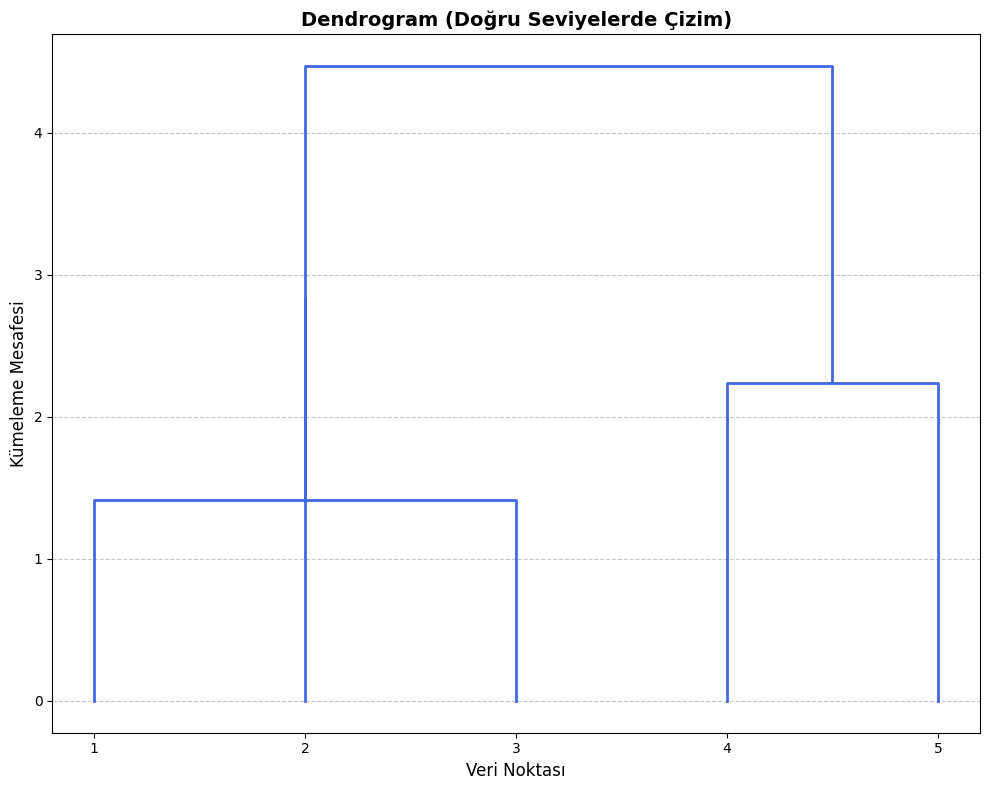

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Veri seti
data = np.array([
    [4, 2],
    [6, 4],
    [5, 1],
    [10, 6],
    [11, 8]
])

# 2. Öklidyen mesafesi hesaplama
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

# 3. Hiyerarşik kümeleme fonksiyonu
def hierarchical_clustering(data):
    n = len(data)
    clusters = {i: [i] for i in range(n)}  # Her veri kendi kümesi
    distances = np.zeros((n, n))           # Mesafe matrisi

    # Tüm mesafeleri hesapla
    for i in range(n):
        for j in range(i + 1, n):
            distances[i, j] = euclidean_distance(data[i], data[j])
            distances[j, i] = distances[i, j]

    linkage_matrix = []

    while len(clusters) > 1:
        # En yakın iki küme bulun
        min_dist = float('inf')
        cluster_pair = (None, None)
        keys = list(clusters.keys())
        for i in range(len(keys)):
            for j in range(i + 1, len(keys)):
                c1, c2 = keys[i], keys[j]
                dist = min(distances[p1, p2] for p1 in clusters[c1] for p2 in clusters[c2])
                if dist < min_dist:
                    min_dist = dist
                    cluster_pair = (c1, c2)

        # İki kümeyi birleştir
        c1, c2 = cluster_pair
        new_cluster = clusters[c1] + clusters[c2]
        new_cluster_id = max(clusters.keys()) + 1
        clusters[new_cluster_id] = new_cluster
        del clusters[c1]
        del clusters[c2]

        # Linkage matrisine ekle
        linkage_matrix.append([c1, c2, min_dist, len(new_cluster)])

    return np.array(linkage_matrix)

# 4. Linkage matrisini oluştur
linkage_matrix = hierarchical_clustering(data)

# 5. Dendrogram çizim fonksiyonu
def plot_dendrogram(linkage_matrix, labels):
    plt.figure(figsize=(10, 8))
    current_positions = {i: (i, 0) for i in range(len(labels))}  # Her kümenin (x, y) koordinatları

    for i, (c1, c2, dist, _) in enumerate(linkage_matrix):
        # Alt kümelerin pozisyonlarını al
        x1, y1 = current_positions[c1]
        x2, y2 = current_positions[c2]
        y = dist  # Birleşme yüksekliği

        # Alt kümeler sıfıra inmesin, doğru yüksekliği kullan
        plt.plot([x1, x1, x2, x2], [y1, y, y, y2], c='royalblue', lw=2)

        # Yeni kümenin pozisyonunu güncelle
        current_positions[len(labels) + i] = ((x1 + x2) / 2, y)

    # Ekseni ve tasarımı ayarla
    plt.xticks(range(len(labels)), labels, fontsize=10)
    plt.title("Dendrogram (Doğru Seviyelerde Çizim)", fontsize=14, fontweight='bold')
    plt.xlabel("Veri Noktası", fontsize=12)
    plt.ylabel("Kümeleme Mesafesi", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# 6. Dendrogram'ı çiz
plot_dendrogram(linkage_matrix, labels=np.arange(1, len(data) + 1))


# Hazır Kodlar

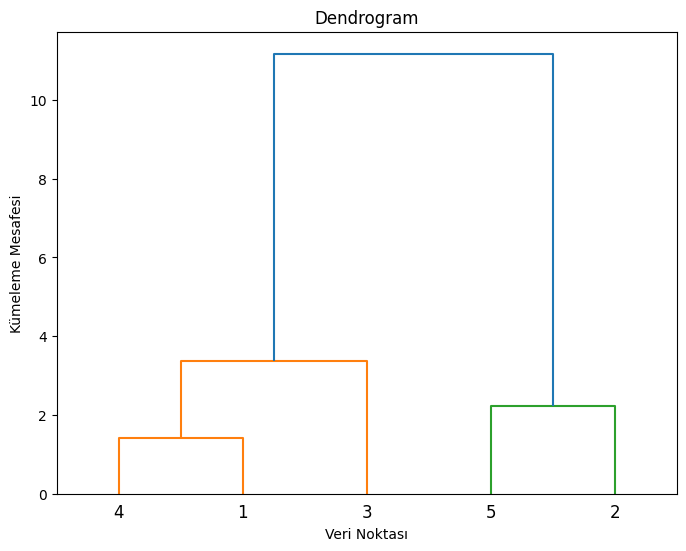

In [14]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# 1. Veri setini oluştur
data = np.array([
    [4, 2],
    [11, 8],
    [6, 4],
    [5, 1],
    [10, 6]
])

# 2. Bağlantı matrisi oluştur (linkage)
# 'ward' yöntemiyle hiyerarşik kümeleme yapılır
linked = linkage(data, method='ward')

# 3. Dendrogram çizimi
plt.figure(figsize=(8, 6))
dendrogram(linked,
           orientation='top',   # Yukarıdan aşağıya çizim
           labels=np.arange(1, len(data)+1),  # Her bir veri noktası için etiket
           distance_sort='descending',
           show_leaf_counts=True)  # Yapraklardaki örnek sayısını göster

plt.title("Dendrogram")
plt.xlabel("Veri Noktası")
plt.ylabel("Kümeleme Mesafesi")
plt.show()


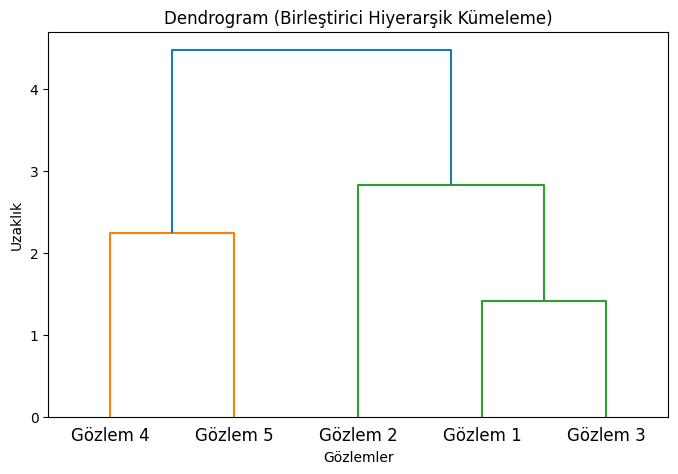

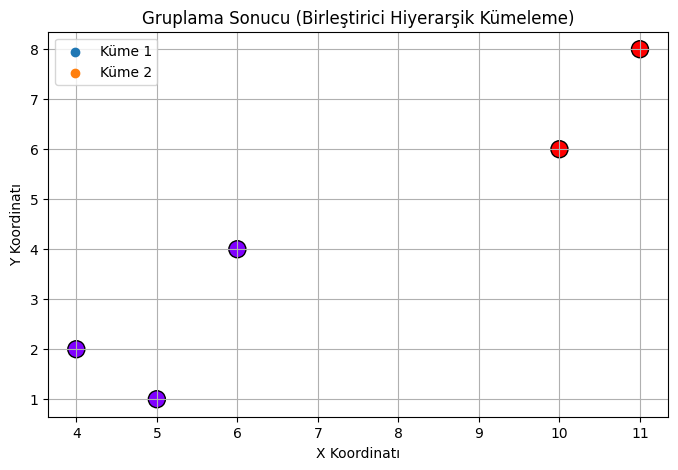

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import AgglomerativeClustering

# Veri seti: X ve Y koordinatları
data = np.array([
    [4, 2],
    [6, 4],
    [5, 1],
    [10, 6],
    [11, 8]
])

# 1. Dendrogram için hiyerarşik bağlantıları hesapla (scipy kullanımı)
linkage_matrix = linkage(data, method='single')  # 'single' = En Yakın Komşu
plt.figure(figsize=(8, 5))
plt.title("Dendrogram (Birleştirici Hiyerarşik Kümeleme)")
dendrogram(linkage_matrix, labels=[f'Gözlem {i+1}' for i in range(len(data))])
plt.xlabel("Gözlemler")
plt.ylabel("Uzaklık")
plt.show()

# 2. Hiyerarşik kümeleme (AgglomerativeClustering ile grupla)
n_clusters = 2  # Kaç küme istediğinizi belirtin
# 'affinity' parametresi 'single' linkage ile kullanılamaz, kaldırıldı.
cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage='single')
labels = cluster.fit_predict(data)

# 3. Veriyi ve gruplamaları görselleştir
plt.figure(figsize=(8, 5))
plt.title("Gruplama Sonucu (Birleştirici Hiyerarşik Kümeleme)")
for label in np.unique(labels):
    group = data[labels == label]
    plt.scatter(group[:, 0], group[:, 1], label=f'Küme {label+1}')

plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='rainbow', edgecolor='k', s=150)  # Genel veri
plt.xlabel("X Koordinatı")
plt.ylabel("Y Koordinatı")
plt.legend()
plt.grid(True)
plt.show()

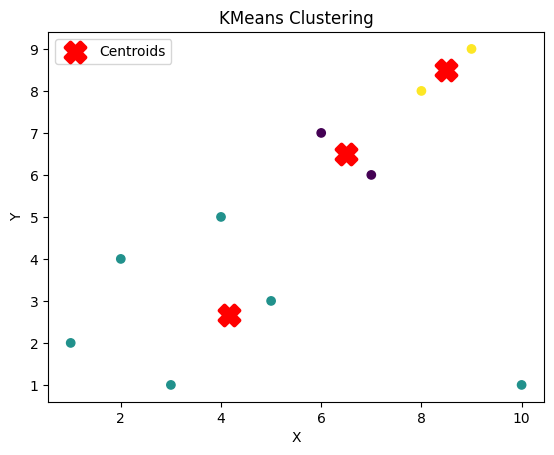

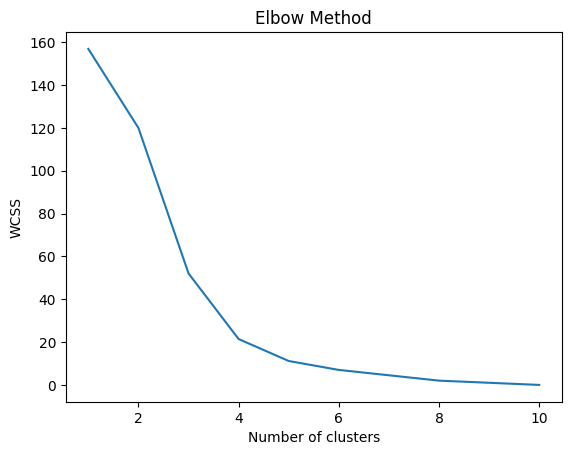

Küme etiketleri:
[1 1 1 1 1 0 0 2 2 1]
Küme merkezleri:
[[6.5        6.5       ]
 [4.16666667 2.66666667]
 [8.5        8.5       ]]


In [16]:
# prompt: Clustering kodu nasıl yazılabilir ?

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Örnek veri (CSV dosyasından okunabilir)
data = {'X': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'Y': [2, 4, 1, 5, 3, 7, 6, 8, 9, 1]}
df = pd.DataFrame(data)

# KMeans modelini oluşturma (küme sayısını belirleyin)
kmeans = KMeans(n_clusters=3, random_state=0) # n_clusters: Küme sayısı

# Veriyi model ile eğitme
kmeans.fit(df)

# Küme etiketlerini al
labels = kmeans.labels_

# Küme merkezlerini al
centroids = kmeans.cluster_centers_

# Sonuçları görselleştirme
plt.scatter(df['X'], df['Y'], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, linewidths=3, color='r', label='Centroids')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('KMeans Clustering')
plt.legend()
plt.show()


# Küme sayısını belirlemek için elbow yöntemi
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Veri setini CSV dosyasından okumak için:
# df = pd.read_csv("verisetiniz.csv")  # verisetiniz.csv dosyasını yükleyin


print(f"Küme etiketleri:\n{labels}")
print(f"Küme merkezleri:\n{centroids}")